<IPython.core.display.Javascript object>


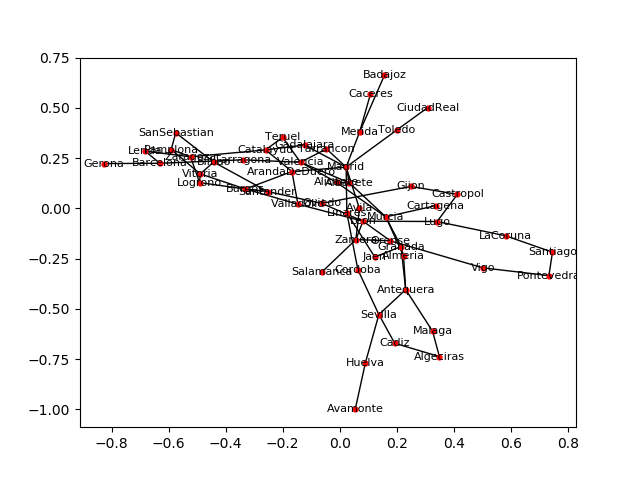

In [1]:
%matplotlib notebook
import numpy as np
import networkx as nx
import matplotlib
import math
from copy import copy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

network = nx.Graph()
network.add_edge('Barcelona','Gerona', weight = 20)
network.add_edge('Barcelona','Tarragona', weight = 20)
network.add_edge('Barcelona','Lerida', weight = 20)
network.add_edge('Lerida','Zaragoza', weight = 30)
network.add_edge('Zaragoza','Pamplona', weight = 40)
network.add_edge('Zaragoza','Logrono', weight = 40)
network.add_edge('Pamplona','Vitoria', weight = 20)
network.add_edge('Logrono','Vitoria', weight = 20)
network.add_edge('Pamplona','SanSebastian', weight = 20)
network.add_edge('Vitoria', 'Bilbao', weight = 20)
network.add_edge('Vitoria','Bilbao', weight = 20)
network.add_edge('SanSebastian','Bilbao', weight = 20)
network.add_edge('Vitoria','Burgos', weight = 30)
network.add_edge('Logrono','Burgos', weight = 30)
network.add_edge('Santander','Burgos', weight = 30)
network.add_edge('Santander','Bilbao', weight = 20)
network.add_edge('Santander','Oviedo', weight = 40)
network.add_edge('Gijon','Oviedo', weight = 10)
network.add_edge('Gijon','Castropol', weight = 20)
network.add_edge('Leon','Oviedo', weight = 30)
network.add_edge('Lugo','Castropol', weight = 20)
network.add_edge('Lugo','Leon', weight = 30)
network.add_edge('Lugo','LaCoruna', weight = 20)
network.add_edge('Santiago','LaCoruna', weight = 20)
network.add_edge('Santiago','Pontevedra', weight = 20)
network.add_edge('Vigo','Pontevedra', weight = 10)
network.add_edge('Vigo','Orense', weight = 10)
network.add_edge('Leon','Orense', weight = 40)
network.add_edge('Leon','Valladolid', weight = 30)
network.add_edge('Burgos','Valladolid', weight = 30)
network.add_edge('Burgos','ArandaDeDuero', weight = 20)
network.add_edge('Valladolid','ArandaDeDuero', weight = 20)
network.add_edge('Catalayud','ArandaDeDuero', weight = 40)
network.add_edge('Catalayud','Zaragoza', weight = 20)
network.add_edge('Catalayud','Teruel', weight = 40)
network.add_edge('Valencia','Teruel', weight = 40)
network.add_edge('Valencia','Tarragona', weight = 50)
network.add_edge('Valencia','Tarrancon', weight = 50)
network.add_edge('Catalayud','Gadalajara', weight = 40)
network.add_edge('Madrid','Tarrancon', weight = 30)
network.add_edge('Madrid','Gadalajara', weight = 30)
network.add_edge('Madrid','ArandaDeDuero', weight = 40)
network.add_edge('Madrid','Avila', weight = 20)
network.add_edge('Madrid','Toledo', weight = 20)
network.add_edge('Madrid','Merida', weight = 60)
network.add_edge('Avila','Zamora', weight = 40)
network.add_edge('Leon','Zamora', weight = 30)
network.add_edge('Orense','Zamora', weight = 40)
network.add_edge('Salamanca','Zamora', weight = 20)
network.add_edge('Merida','Caceres', weight = 20)
network.add_edge('Merida','Badajoz', weight = 10)
network.add_edge('Madrid','Albacete', weight = 60)
network.add_edge('Valencia','Albacete', weight = 40)
network.add_edge('Albacete','Alicante', weight = 40)
network.add_edge('Valencia','Alicante', weight = 40)
network.add_edge('Murcia','Alicante', weight = 20)
network.add_edge('Murcia','Albacete', weight = 40)
network.add_edge('Murcia','Cartagena', weight = 20)
network.add_edge('Murcia','Granada', weight = 50)
network.add_edge('Murcia','Almeria', weight = 40)
network.add_edge('Almeria','Granada', weight = 30)
network.add_edge('Jaen','Granada', weight = 20)
network.add_edge('Jaen','Linares', weight = 10)
network.add_edge('Madrid','Linares', weight = 60)
network.add_edge('Antequera','Granada', weight = 20)
network.add_edge('Antequera','Malaga', weight = 20)
network.add_edge('Antequera','Almeria', weight = 40)
network.add_edge('Toledo','CiudadReal', weight = 30)
network.add_edge('Cordoba','Linares', weight = 30)
network.add_edge('Cordoba','Sevilla', weight = 30)
network.add_edge('Antequera','Sevilla', weight = 40)
network.add_edge('Cadiz','Sevilla', weight = 30)
network.add_edge('Cadiz','Algeciras', weight = 10)
network.add_edge('Algeciras','Malaga', weight = 30)
network.add_edge('Huelva','Sevilla', weight = 20)
network.add_edge('Huelva','Avamonte', weight = 10)


nx.draw_networkx(network, node_size = 12, font_size=8)
#nx.draw(network, node_size = 20)

<IPython.core.display.Javascript object>


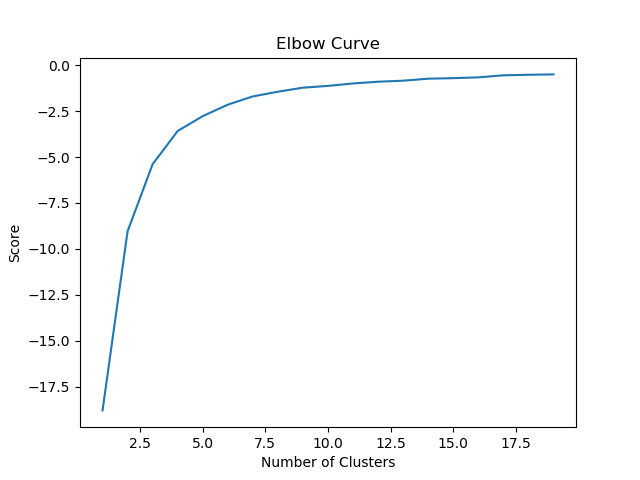

CENTROIDS
[[ 0.41200565 -0.41079917]
 [-0.28327341 -0.10008776]
 [-0.05147207  0.61236777]]


<IPython.core.display.Javascript object>


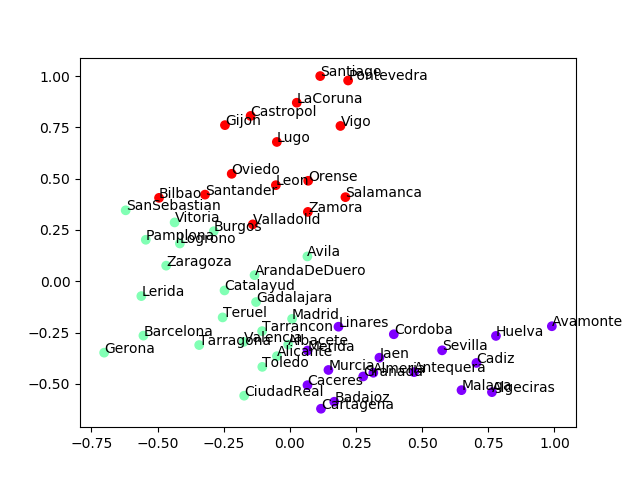

In [2]:
%matplotlib notebook
data = nx.spring_layout(network)
X, Y = [], []
labels = sorted(data.keys())

for key in labels:
    X.append([data[key][0], data[key][1]])
    

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
figure = pl.figure(1)
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
figure.show()

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print("CENTROIDS")
print(centroids)
figure2 = pl.figure(2)
X = np.array(X)
pl.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

for i in range(0, len(X)):
    pl.annotate(labels[i], (X[i][0], X[i][1]))
figure2.show()


city_to_cluster = {}
for i in range(0, len(labels)):
    city_to_cluster[labels[i]] = kmeans.labels_[i]

nx.average_shortest_path_length(network, weight = "weight")
cluster_to_cities = {}
for i in range(0, kmeans.n_clusters):
    cluster_to_cities[i] = []
    for j in list(np.where(kmeans.labels_ == i)[0]):
        cluster_to_cities[i].append(labels[j])

clusterTransitionMatrix = [[[]*kmeans.n_clusters]*kmeans.n_clusters]*kmeans.n_clusters
for i in range(0, kmeans.n_clusters):
    for j in range(0, kmeans.n_clusters):
        count = [0, 0] #value, cardinality
        for origin in cluster_to_cities[i]:
            for destiny in cluster_to_cities[j]:
                count[0] += nx.shortest_path_length(network, source=origin, target=destiny, weight="weight")
                count[1] += 1
        
        if i == j :
            clusterTransitionMatrix[i][j] = count[0]/count[1]
        else:
            clusterTransitionMatrix[i][j] = count[0]/count[1]
            clusterTransitionMatrix[j][i] = count[0]/count[1]


In [119]:
class Supplier:
    def __init__(self, name, city, rating, price_per_load = None, profit_percentage = None, fixed_price = False, optimize = False):
        self.name = name
        self.city = city
        self.trucks = []
        self.jobs = []
        self.profit = 0
        self.pending_request = [None, 0, 0, 0]
        self.executed_num=0
        self.fixed_price= fixed_price
        self.optimize = optimize
        if rating > 5:
            self.rating = 5
        elif rating < 1:
            self.rating = 1
        else:
            self.rating = rating

        if profit_percentage != None:
            self.profit_percentage = profit_percentage
            self.price_per_load = None
        elif price_per_load != None:
            self.price_per_load = price_per_load
            self.profit_percentage = None

    def printName(self):
        print(self.name)
        
    def addTruck(self, truck):
        self.trucks.append(truck)
        
    def reset(self):
        self.jobs = []
        self.pending_request = [None, 0, 0, 0]
        for truck in self.trucks:
            truck.reset()
    
    def ratingBoost(self, value):
        self.rating = self.rating + value
        if self.rating > 5:
            self.rating = 5
        elif self.rating < 1:
            self.rating = 1
    
    def calculatePrice(self,source, request):
        if self.fixed_price and (source != request.origin):
            distance_cost = clusterTransitionMatrix[city_to_cluster[source]][city_to_cluster[request.origin]]
            distance_cost += clusterTransitionMatrix[city_to_cluster[request.origin]][city_to_cluster[request.destiny]]
            distance_cost *= 1.4
            profit = 0
        elif self.fixed_price and (source == request.origin):
            distance_cost = clusterTransitionMatrix[city_to_cluster[request.origin]][city_to_cluster[request.destiny]]
            distance_cost *= 1.4
            profit = 0
        elif self.price_per_load != None:
            distance_to_origin_cost = nx.shortest_path_length(network, source=source, target=request.origin, weight="weight")
            distance_cost = nx.shortest_path_length(network, source=request.origin, target=request.destiny, weight="weight") + distance_to_origin_cost
            profit = (request.load * self.price_per_load)
        elif self.profit_percentage != None:
            distance_to_origin_cost = nx.shortest_path_length(network, source=source, target=request.origin, weight="weight")
            distance_cost = nx.shortest_path_length(network, source=request.origin, target=request.destiny, weight="weight") + distance_to_origin_cost
            profit = distance_cost * self.profit_percentage
        price = distance_cost + profit
        return price, profit
        
    def acceptRequest(self):
        self.trucks[self.pending_request[3]].addRequest(self.pending_request[0])
        self.jobs.append(self.pending_request)
    
    def executeRequest(self):
        journey_outcome = [0,0] #[number of success requests, numbor of unsuccesfull requests]
        trucks_visited = []
        sales = [0]*len(self.trucks)
        for job in self.jobs:
            success = True
            if self.trucks[job[3]].damaged:
                continue
            else:
                success = np.random.choice([False, True], p=[0.05,0.95])
            
            if success:
                if self.optimize == True and job[3] not in trucks_visited:
                    real_cost = self.calculateBestJourney(job[3])
                    self.profit -= real_cost #applies the cost of jorney for that truck
                    trucks_visited.append(job[3])
                if self.optimize == True:
                    self.profit += job[1] #adds the price because the cost as been applied
                else:
                    self.profit += job[2] #adds the profit calculated from deal, because no cost optimization was applied
                
                self.executed_num += 1    
                journey_outcome[0] += 1
                
            else:
                journey_outcome[1] += 1
                if self.optimize == True:
                    continue #already applied the cost of jorney
                self.profit -= (job[1] - job[2]) #hasnt applied the cost of journey
                self.trucks[job[3]].damaged = True
                
        self.reset()
        #print(self.name + ": " + str(journey_outcome[0]) + " requests done, " + str(journey_outcome[1]) + " failed.")
        return journey_outcome

    def calculateBestJourney(self, truck_i):
        requests = self.trucks[truck_i].requests
        request_dict = {}
        for request in requests:
            if request.origin not in request_dict:
                request_dict[request.origin] = [request.destiny]
            else:
                if request.destiny not in request_dict[request.origin]:
                    request_dict[request.origin].append(request.destiny)
        return self.visitNextCity(0, self.city, request_dict, [])
        
    def visitNextCity(self, current_cost, current_city, request_dict, destinations):
        lowest_cost=math.inf

        for destiny in destinations:
            new_destinations = copy(destinations)
            new_destinations.remove(destiny)
            current_cost += nx.shortest_path_length(network, source=current_city, target=destiny, weight="weight")
            rec_cost = self.visitNextCity(current_cost, destiny, request_dict, new_destinations)
            if rec_cost <= lowest_cost:
                 lowest_cost = rec_cost
        
        for origin_key in request_dict.keys():
            new_destinations = copy(destinations)
            new_request_dict = copy(request_dict)
            for destiny in request_dict[origin_key]:
                if destiny not in new_destinations:
                    new_destinations.append(destiny)
            new_request_dict.pop(origin_key, None)
            current_cost += nx.shortest_path_length(network, source=current_city, target=origin_key, weight="weight")
            rec_cost = self.visitNextCity(current_cost, origin_key, new_request_dict, new_destinations)
            if rec_cost <= lowest_cost:
                 lowest_cost = rec_cost
        if lowest_cost == math.inf:
            return current_cost
        return lowest_cost

            
class Dummy(Supplier):
    def __init__(self, name, city, rating, price_per_load = None, profit_percentage = None, fixed_price = False, optimize = False):
        super(Dummy, self ).__init__(name, city, rating, price_per_load = price_per_load, profit_percentage = profit_percentage, fixed_price = fixed_price, optimize = optimize)
    
    def makeOffer(self, request):
        bestOffer = [request, math.inf, 0, 0]
        for i in range(0, len(self.trucks)):
            truck = self.trucks[i]
            if (not truck.occupied) and (not truck.damaged) and (request.load <= truck.capacity):
                price, profit = self.calculatePrice(self.city, request)
                if(price < bestOffer[1]):
                    bestOffer[1] = price
                    bestOffer[2] = profit
                    bestOffer[3] = i
                    break
        self.pending_request = bestOffer
        return self.pending_request[1]
    
    
class ProximitiesSupplier(Supplier):
    def __init__(self, name, city, rating, price_per_load = None, profit_percentage = None, fixed_price = False, optimize= False):
        super(ProximitiesSupplier, self ).__init__(name, city, rating, price_per_load = price_per_load, profit_percentage = profit_percentage, fixed_price = fixed_price, optimize = optimize)

        
    def makeOffer(self, request):
        bestOffer = [request, math.inf, 0, 0]
        for i in range(0, len(self.trucks)):
            truck = self.trucks[i]
            if (not truck.occupied) and (not truck.damaged):
                price, profit  = self.calculatePrice(self.city, request)
                if(price < bestOffer[1]):
                    bestOffer[1] = price
                    bestOffer[2] = profit
                    bestOffer[3] = i
                continue
            if truck.load + request.load <= truck.capacity and (not truck.damaged):   
                price,profit = self.calculatePrice(truck.requests[-1].destiny, request)
                if(price < bestOffer[1]):
                    bestOffer[1] = price
                    bestOffer[2] = profit
                    bestOffer[3] = i
        self.pending_request = bestOffer
        return self.pending_request[1]
        
class Truck:    
    def __init__(self, capacity):
        self.capacity = capacity
        self.load = 0
        self.occupied = False
        self.damaged = False
        self.requests = []
        
    
    def setDamage(self, damage):
        self.damaged = damage
        
    def setOccupied(self, occupied):
        self.occupied = occupied
        
    def reset(self):
        self.load = 0
        self.occupied = False
        self.damaged = False
        self.requests = []
    
    def addRequest(self, request):
        self.requests.append(request)
        self.load += request.load
        self.occupied = True
        

class Request:
    def __init__(self, maxCost, load, origin, destiny):
        self.maxCost = maxCost
        self.load = load
        self.origin = origin
        self.destiny = destiny
        
def generateRequests(number):
    cities = network.nodes()
    requests = []
    while number > 0:
        origin = list(cities)[np.random.randint(len(cities))]
        destiny = list(cities)[np.random.randint(len(cities))]

        if origin == destiny:
            continue
            
        distance_cost = nx.shortest_path_length(network, source=origin, target=destiny, weight="weight")
        avg_supplier_distance = int((np.array(list(nx.shortest_path_length(network, target=origin, weight="weight").values())).sum())/len(cities))
        load = np.random.randint(1, 21)
        load_value = load * np.random.randint(1,3)
        maxCost = distance_cost + avg_supplier_distance + load_value
        
        requests.append(Request(maxCost, load, origin, destiny))
        number -= 1
    
    return requests
 

In [120]:
def generateTrucks(supplier, num):
    for i in range(0, num):
        supplier.addTruck(Truck(20))

def generateRatingDistribution(suppliers):
    distribution = []
    ratio = 0
    
    if suppliers:
        for supplier in suppliers:
            ratio += supplier.rating
        ratio = 1/ratio

        for supplier in suppliers:
            distribution.append(ratio * supplier.rating)

        return distribution
    return []

    

def biddingSystem():
    for r in reqs:
        offers = []
        for s in suppliers:
            offer = s.makeOffer(r)
            offers.append(offer)
        #print(offers)
        low_supplier = np.random.choice(np.where(offers == np.amin(offers))[0])
        #print("On requets ", r.origin, " to ", r.destiny)
        suppliers[low_supplier].acceptRequest()
    for s in suppliers:
        s.executeRequest()
        

def ratingSystem():    
    for r in reqs:
        suppList = copy(suppliers)
        #print("On request " + r.origin + " -> " + r.destiny)
        while(suppList):
            tempDist = generateRatingDistribution(suppList)
            supplier = np.random.choice(suppList, p = tempDist)
            offer = supplier.makeOffer(r)
            #print(supplier.name + " offered " + str(offer) + " when request max is ", r.maxCost)
            if (offer <= r.maxCost):
                supplier.acceptRequest()
                break
            elif offer == math.inf:
                suppList.pop(suppList.index(supplier))
                #print(supplier.name + ' not available.')
            else:
                suppList.pop(suppList.index(supplier))
                #print(supplier.name + ' is to expensive.')
        #print()
    #Neogtiate here           
    for s in suppliers:
        outcome = s.executeRequest()
        for success in range(0, outcome[0]):
            s.ratingBoost(0.1)
            for supplier_original in suppliers:
                if supplier_original != supplier:
                    supplier_original.ratingBoost(-0.1/len(suppliers))
        for unsuccess in range(0, outcome[1]):
            supplier.ratingBoost(-0.2)


In [85]:
%matplotlib notebook
suppliers = []

suppliers.append(ProximitiesSupplier("DHL", "Barcelona", 3, price_per_load = 3))
suppliers.append(ProximitiesSupplier("UPS", "Madrid", 3, price_per_load = 3))
suppliers.append(ProximitiesSupplier("Fedex", "Avamonte", 3, price_per_load = 3))

bidding_dic = {}

for supplier in suppliers:
    bidding_dic[supplier.name] = [0]
    
    
def generateTrucks(supplier, num):
    for i in range(0, num):
        supplier.addTruck(Truck(40))

generateTrucks(suppliers[0], 5)
generateTrucks(suppliers[1], 5)
generateTrucks(suppliers[2], 5)

for x in range(0, 10):
    epochs = 100
    for i in range(0, epochs):
        #print("----------------EPOCH " + str(i) + "-------------------")

        reqs = generateRequests(40)
        """for r in reqs:
            print(r.maxCost, r.load, r.origin, r.destiny)
        print()"""

        biddingSystem()
        #ratingSystem()
        #print()
        #for supplier in suppliers:
            #print(supplier.name + " Number of Requests done: " + str(supplier.executed_num) + " profit: " + str(supplier.profit))
            #print("Rating: " + str(round(supplier.rating,2)))
            #profits_dic[supplier].append(supplier.profit - sum(profits_dic[supplier]))
            #ratings_dic[supplier].append(supplier.rating)
        #print()
    
    for supplier in suppliers:
        bidding_dic[supplier.name][0] += supplier.profit

for supplier in suppliers:
    bidding_dic[supplier.name] = bidding_dic[supplier.name][0] / 10
    
bidding_dic
'''
legend = []
for supplier in suppliers:
    legend.append(supplier.name)
    pl.scatter(ratings_dic[supplier], profits_dic[supplier], cmap='rainbow')
pl.xlabel('Ratings')
pl.ylabel('Profits')
pl.title('Rating/Profit')
pl.legend(legend)
pl.show()
'''

"\nlegend = []\nfor supplier in suppliers:\n    legend.append(supplier.name)\n    pl.scatter(ratings_dic[supplier], profits_dic[supplier], cmap='rainbow')\npl.xlabel('Ratings')\npl.ylabel('Profits')\npl.title('Rating/Profit')\npl.legend(legend)\npl.show()\n"

In [124]:
%matplotlib notebook
suppliers = []
'''
suppliers.append(ProximitiesSupplier("DHL", "Madrid", 3, profit_percentage = 0.1))
suppliers.append(ProximitiesSupplier("UP", "Madrid", 3, profit_percentage = 0.2))
suppliers.append(ProximitiesSupplier("UPS", "Madrid", 3, profit_percentage = 0.3))
suppliers.append(ProximitiesSupplier("US", "Madrid", 3, profit_percentage = 0.4))
suppliers.append(ProximitiesSupplier("Fedex", "Madrid", 3, profit_percentage = 0.5))
suppliers.append(ProximitiesSupplier("PS", "Madrid", 3, profit_percentage = 0.6))
suppliers.append(ProximitiesSupplier("CTT", "Madrid", 3, profit_percentage = 0.7))
suppliers.append(ProximitiesSupplier("S", "Madrid", 3, profit_percentage = 0.8))
suppliers.append(ProximitiesSupplier("POST", "Madrid", 3, profit_percentage = 0.9))
'''
suppliers.append(ProximitiesSupplier("DHL", "Madrid", 3, price_per_load = 5, optimize = True))
suppliers.append(Dummy("UPS", "Madrid", 3, price_per_load = 5))
suppliers.append(ProximitiesSupplier("Fedex", "Madrid", 3, price_per_load = 5))

rating_dic = {}
for supplier in suppliers:
    rating_dic[supplier.name] = [0]*100

def generateTrucks(supplier, num):
    for i in range(0, num):
        supplier.addTruck(Truck(40))

generateTrucks(suppliers[0], 5)
generateTrucks(suppliers[1], 5)
generateTrucks(suppliers[2], 5)

for x in range(0, 10):
    epochs = 100
    for i in range(0, epochs):
        #print("----------------EPOCH " + str(i) + "-------------------")

        reqs = generateRequests(200)
        """for r in reqs:
            print(r.maxCost, r.load, r.origin, r.destiny)
        print()"""

        #biddingSystem()
        ratingSystem()
        #print()
        '''
        for supplier in suppliers:
            print(supplier.name + " Number of Requests done: " + str(supplier.executed_num) + " profit: " + str(supplier.profit))
            print("Rating: " + str(round(supplier.rating,2)))
            profits_dic[supplier].append(supplier.profit - sum(profits_dic[supplier]))
        print()
        '''
        for supplier in suppliers:
            if i != 0:
                rating_dic[supplier.name][i] += (supplier.profit - rating_dic[supplier.name][i-1])
            else:
                 rating_dic[supplier.name][i] += (supplier.profit)

for supplier in suppliers:
    for i in range(0, 100):
        rating_dic[supplier.name] = rating_dic[supplier.name][i] / 10
    


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


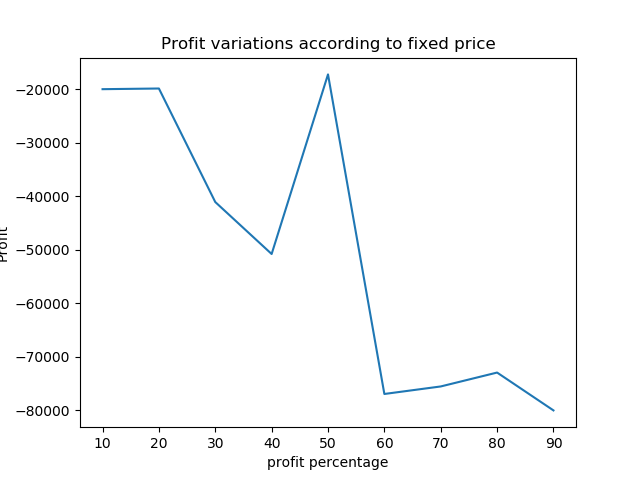

In [122]:
%matplotlib notebook
legend = []

pl.plot(["10", "20", "30", "40","50","60", "70","80", "90"], rating_dic.values())
pl.xlabel('profit percentage')
pl.ylabel('Profit')
pl.title('Profit variations according to fixed price')
pl.show()

{'DHL': 134975.8, 'Fedex': 105590.7, 'UPS': 168091.8}